In [1]:
!pip3 install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\wynnm\anaconda3\lib\site-packages (2.4.1)


In [2]:
!pip3 install keras

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [8]:
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [10]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([ Dense(32, activation='relu', input_shape=(10,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid'),])

In [12]:
model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 37ms/step - loss: 0.7050 - accuracy: 0.4815 - val_loss: 0.6979 - val_accuracy: 0.4247
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4915 - val_loss: 0.6896 - val_accuracy: 0.5890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5791 - val_loss: 0.6823 - val_accuracy: 0.6712
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6141 - val_loss: 0.6769 - val_accuracy: 0.7306
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6700 - val_loss: 0.6726 - val_accuracy: 0.7580
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.7184 - val_loss: 0.6688 - val_accuracy: 0.7991
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.7145 - val_loss: 0.6650 - val_accuracy: 0.8082
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8623 - val_loss: 0.3263 - val_accuracy: 0.9087
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8673 - val_loss: 0.3238 - val_accuracy: 0.9087
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8841 - val_loss: 0.3242 - val_accuracy: 0.8995
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8719 - val_loss: 0.3204 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8820 - val_loss: 0.3147 - val_accuracy: 0.9041
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8812 - val_loss: 0.3160 - val_accuracy: 0.8995
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8870 - val_loss: 0.3093 - val_accuracy: 0.9041
Epoch 

In [14]:
model.evaluate(X_test, Y_test) [1]

7/7 [==============================] - 0s 832us/step - loss: 0.3339 - accuracy: 0.8584


0.8584474921226501

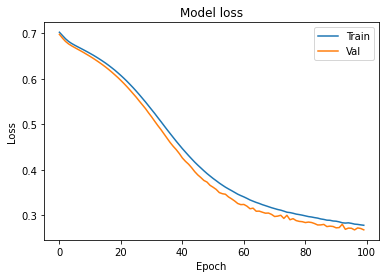

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

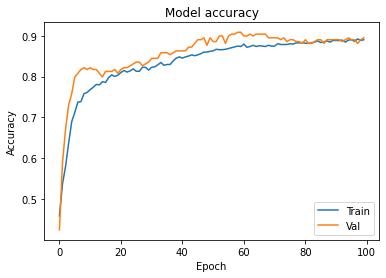

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [17]:
model_2 = Sequential([    Dense(1000, activation='relu', input_shape=(10,)),    Dense(1000, activation='relu'),    Dense(1000, activation='relu'),    Dense(1000, activation='relu'),    Dense(1, activation='sigmoid'),])
model_2.compile(optimizer='adam', loss='binary_crossentropy',              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100,          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 31ms/step - loss: 0.5733 - accuracy: 0.6428 - val_loss: 0.3366 - val_accuracy: 0.8950
Epoch 2/100
32/32 [==============================] - 1s 25ms/step - loss: 0.3321 - accuracy: 0.8673 - val_loss: 0.2805 - val_accuracy: 0.9041
Epoch 3/100
32/32 [==============================] - 1s 25ms/step - loss: 0.2940 - accuracy: 0.8812 - val_loss: 0.2800 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 1s 23ms/step - loss: 0.2801 - accuracy: 0.8707 - val_loss: 0.3252 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.3222 - accuracy: 0.8818 - val_loss: 0.2518 - val_accuracy: 0.9178
Epoch 6/100
32/32 [==============================] - 1s 23ms/step - loss: 0.2396 - accuracy: 0.9175 - val_loss: 0.2251 - val_accuracy: 0.9224
Epoch 7/100
32/32 [==============================] - 1s 23ms/step - loss: 0.2402 - accuracy: 0.8989 - val_loss: 0.2231 - val_accuracy: 0.9178
Epoch 

32/32 [==============================] - 1s 24ms/step - loss: 0.1945 - accuracy: 0.9100 - val_loss: 0.3115 - val_accuracy: 0.9178
Epoch 59/100
32/32 [==============================] - 1s 23ms/step - loss: 0.1486 - accuracy: 0.9382 - val_loss: 0.2270 - val_accuracy: 0.9041
Epoch 60/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1599 - accuracy: 0.9281 - val_loss: 0.2642 - val_accuracy: 0.9041
Epoch 61/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1471 - accuracy: 0.9366 - val_loss: 0.2486 - val_accuracy: 0.9132
Epoch 62/100
32/32 [==============================] - 1s 23ms/step - loss: 0.2027 - accuracy: 0.9107 - val_loss: 0.2515 - val_accuracy: 0.9087
Epoch 63/100
32/32 [==============================] - 1s 23ms/step - loss: 0.1335 - accuracy: 0.9437 - val_loss: 0.2279 - val_accuracy: 0.8995
Epoch 64/100
32/32 [==============================] - 1s 23ms/step - loss: 0.1556 - accuracy: 0.9320 - val_loss: 0.3151 - val_accuracy: 0.8995
Epoch 65/100

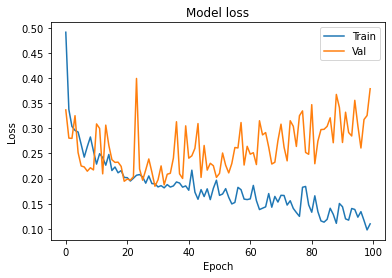

In [18]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

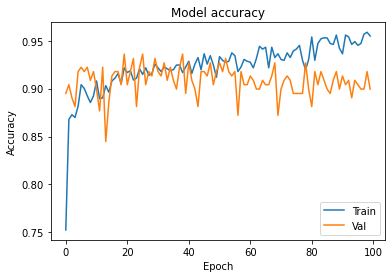

In [19]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [20]:
from keras.layers import Dropout
from keras import regularizers

In [21]:
model_3 = Sequential([ Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

In [22]:
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 41ms/step - loss: 21.1225 - accuracy: 0.5844 - val_loss: 3.8683 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 2.5073 - accuracy: 0.8038 - val_loss: 0.6517 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6181 - accuracy: 0.8536 - val_loss: 0.4785 - val_accuracy: 0.8995
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.5254 - accuracy: 0.8728 - val_loss: 0.4545 - val_accuracy: 0.9087
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.4872 - accuracy: 0.8894 - val_loss: 0.4419 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - ETA: 0s - loss: 0.4979 - accuracy: 0.86 - 1s 37ms/step - loss: 0.4969 - accuracy: 0.8654 - val_loss: 0.4428 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4836 - accuracy: 0.8807 - val

32/32 [==============================] - 1s 35ms/step - loss: 0.4176 - accuracy: 0.8938 - val_loss: 0.4063 - val_accuracy: 0.8904
Epoch 59/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4094 - accuracy: 0.8900 - val_loss: 0.3942 - val_accuracy: 0.9132
Epoch 60/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4056 - accuracy: 0.8905 - val_loss: 0.4197 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4464 - accuracy: 0.8811 - val_loss: 0.4311 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4133 - accuracy: 0.8984 - val_loss: 0.3971 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4304 - accuracy: 0.8872 - val_loss: 0.4188 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4210 - accuracy: 0.8824 - val_loss: 0.4437 - val_accuracy: 0.8904
Epoch 65/100

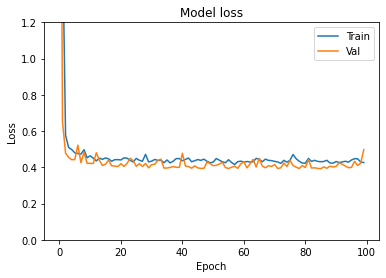

In [24]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

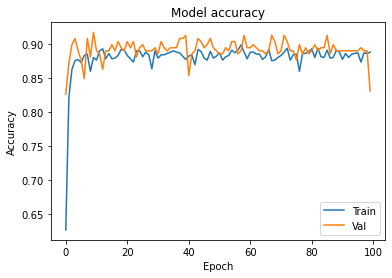

In [26]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()